# Parrot ML Procject - Korea Income
## Project Ver 3.0


### 1. 전처리

### 2. 모델링

## 1. 전처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data=pd.read_csv('/Users/ohguma/Desktop/sogang/8학기/parrot/플젝/Kor_income.csv',index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78928 entries, 77530 to 759
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78928 non-null  int64  
 1   year                78928 non-null  int64  
 2   wave                78928 non-null  int64  
 3   region              78928 non-null  int64  
 4   family_member       78928 non-null  int64  
 5   gender              78928 non-null  int64  
 6   year_born           78928 non-null  int64  
 7   education_level     78928 non-null  int64  
 8   marriage            78928 non-null  int64  
 9   religion            78928 non-null  int64  
 10  occupation          78928 non-null  object 
 11  company_size        78928 non-null  object 
 12  reason_none_worker  78928 non-null  object 
 13  income              78928 non-null  float64
dtypes: float64(1), int64(10), object(3)
memory usage: 9.0+ MB


### 1) 파생변수 생성

In [2]:
data['age']=data['year']-data['year_born']
data.head()

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.0,65
67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.0,79
38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.0,45
72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.0,64
21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.0,77


### 2) 불필요 변수 삭제

In [3]:
data=data.drop(columns=['id', 'wave', 'year_born'])
data.head()

,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
77530,2005,3,1,2,2,2,1,617,1,,460.0,65
67016,2018,4,3,1,5,1,2,,,9,1713.0,79
38931,2012,2,3,1,6,3,1,510,1,,2854.0,45
72033,2011,4,5,1,3,1,1,611,1,,4290.0,64
21862,2017,4,2,1,2,1,2,,,10,1608.0,77


### 3) 데이터 삭제

In [6]:
index=data[(data['marriage']==0)|(data['marriage']==9)|(data['marriage']==6)].index
index1=data[data['religion']==9].index
index2=data[data['company_size']=='99'].index
index3=data[data['reason_none_worker']=='0'].index
data=data.drop(index)
data=data.drop(index1)
data=data.drop(index2)
data=data.drop(index3)
data.count()

year                  78805
region                78805
family_member         78805
gender                78805
education_level       78805
marriage              78805
religion              78805
occupation            78805
company_size          78805
reason_none_worker    78805
income                78805
age                   78805
dtype: int64

### 4) occupation, reason_none_worker 처리
1. occupation, reason_none_worker 결측치 교집합 제거
2. 무직(occupation 결측치) -> occupation 1100으로 설정
3. reason_none_worker 결측치 -> reason_none_worker 100
4. reason_none_worker 99->3
5. occupation 일의 자리 자르기

In [7]:
#결측치 교집합 제거
index4=data[(data['occupation']==' ')&(data['reason_none_worker']==' ')].index
data=data.drop(index4)

#무직 -> occupation에 value 1100로 추가
data=data.replace({'occupation': ' '}, '1100')

#reason 결측치 -> 100으로 추가
data=data.replace({'reason_none_worker': ' '}, '100')

#reason 99 -> 3
data=data.replace({'reason_none_worker': '99'}, '3')

#company ' ' -> 0
data=data.replace({'company_size': ' '}, '0')

#object -> int
data=data.astype({'occupation':'int'})
data=data.astype({'reason_none_worker':'int'})
data=data.astype({'company_size':'int'})

data.dtypes

year                    int64
region                  int64
family_member           int64
gender                  int64
education_level         int64
marriage                int64
religion                int64
occupation              int64
company_size            int64
reason_none_worker      int64
income                float64
age                     int64
dtype: object

In [8]:
#카테고리 데이터를 income 순으로 정렬해주고 그 순서대로 새로 labeling 해주는 함수
def resort(x, y):
    x[y]=x[y]*100
    z=x.groupby(y)['income'].mean()
    n=len(z)
    z=z.to_frame()
    z=z.sort_values(by=['income'], ascending=True)
    z['new']=range(n)
    z['original']=z.index.values
    
    for i in range(n):
        x=x.replace({y: z.iloc[i,2]}, z.iloc[i,1])
        
    return x

#카테고리 데이터를 income 순으로 정렬해주고 그 순서대로 새로 labeling 해주는 함수2
#라벨 이름이 income이 됨
def resort2(x, y):
    x[y]=x[y]*100
    z=x.groupby(y)['income'].mean()
    n=len(z)
    z=z.to_frame()
    z=z.sort_values(by=['income'], ascending=True)
    z['new']=range(n)
    z['original']=z.index.values
    
    for i in range(n):
        x=x.replace({y: z.iloc[i,2]}, z.iloc[i,0])
        
    return x

# 인코딩할 변수의 조합을 바꿔가며 최적의 rmse를 만드는 조합 찾기

data2=data.copy()
#data2=resort(data2, 'year')
data2=resort2(data2, 'region')
#data2=resort(data2, 'family_member')
#data2=resort(data2, 'gender')
#data2=resort(data2, 'education_level')
#data2=resort(data2, 'marriage')
#data2=resort(data2, 'religion')
data2=resort2(data2, 'company_size')
data2=resort2(data2, 'occupation')
#data2=resort(data2, 'reason_none_worker')
#data2=resort(data2, 'age')
data2

,year,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
77530,2005,3445.069815,1,2,2,2,1,1089.844656,3451.569986,100,460.000000,65
67016,2018,2785.009818,3,1,5,1,2,1666.194955,1666.194955,9,1713.000000,79
38931,2012,3933.700493,3,1,6,3,1,6180.175034,3451.569986,100,2854.000000,45
72033,2011,2785.009818,5,1,3,1,1,2344.312921,3451.569986,100,4290.000000,64
21862,2017,2785.009818,2,1,2,1,2,1666.194955,1666.194955,10,1608.000000,77
...,...,...,...,...,...,...,...,...,...,...,...,...
45471,2007,3933.700493,4,1,5,1,2,2345.171957,4890.306381,100,5860.000000,42
27886,2006,3933.700493,4,1,5,1,1,3345.899737,4512.249330,100,3744.000000,34
41941,2006,3933.700493,4,1,2,1,2,1666.194955,1666.194955,7,2837.441215,65
61686,2018,2866.400600,1,2,3,2,2,1666.194955,1666.194955,10,1697.000000,82


### 5) 인코딩

In [9]:
data1=data2.copy()
data1=pd.get_dummies(data=data1, columns=['region'])
#data1=pd.get_dummies(data=data1, columns=['region', 'marriage', 'gender'])
data1.head()

,year,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age,region_2785.0098182278953,region_2866.400599641138,region_3110.3479170238297,region_3445.0698150803382,region_3746.823290106203,region_3933.7004928052,region_4074.2565316963687
77530,2005,1,2,2,2,1,1089.844656,3451.569986,100,460.0,65,0,0,0,1,0,0,0
67016,2018,3,1,5,1,2,1666.194955,1666.194955,9,1713.0,79,1,0,0,0,0,0,0
38931,2012,3,1,6,3,1,6180.175034,3451.569986,100,2854.0,45,0,0,0,0,0,1,0
72033,2011,5,1,3,1,1,2344.312921,3451.569986,100,4290.0,64,1,0,0,0,0,0,0
21862,2017,2,1,2,1,2,1666.194955,1666.194955,10,1608.0,77,1,0,0,0,0,0,0


### 6) 이상치 제거

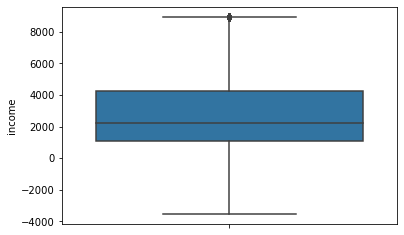

72973

In [13]:
q1=data1['income'].quantile(0.25)
q3=data1['income'].quantile(0.75)
iqr=q3-q1

hlim=q3+1.5*iqr
llim=q1-1.5*iqr

data1=data1.copy()
indexl=data1[data1['income']<llim].index
indexh=data1[data1['income']>hlim].index

data1=data1.drop(indexl)
data1=data1.drop(indexh)

sns.boxplot(data=data1, y='income')
plt.show()
data1['income'].count()

## 2. 모델링

In [14]:
fdata=data1.copy()
target = fdata['income']
fdata.drop(columns=['income'],inplace = True)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(fdata, target, train_size = 0.8, random_state=42)

In [16]:
from xgboost import XGBRegressor

#grid search로 최적의 하이퍼 파라미터 값 찾기
'''xgb=xgb.XGBRegressor()
param_grid={
   'n_estimators' : [100,200,300],
   'learning_rate' : [0.05,0.1,0.2,0.3],
   'max_depth' : [7,8,9,10],
   'gamma' : [0,1,2,3],    
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2', refit=True, n_jobs=-1)
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_
print(grid_search.best_params_)'''

#model training
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=2000, max_depth=9, gamma=2)
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)

#score
rmse=np.sqrt(mean_squared_error(y_pred, y_test))
print('  rmse={}'.format(rmse))

  rmse=1149.4242927640528
